In [5]:
# This was written as a minimal answer to 
# https://stackoverflow.com/questions/34570177/tensorflow-list-of-tensors-for-cost
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.models.rnn import rnn, rnn_cell
print(tf.__version__) 
#> 0.8.0


0.8.0


In [2]:
batch_size  = 2
output_size = input_size  = 2
seq_len     = 10
num_units   = 2

cell = rnn_cell.BasicLSTMCell(num_units)
inputs = [tf.placeholder(tf.float32, shape=[batch_size,input_size ]) for _ in xrange(seq_len)]
result = [tf.placeholder(tf.float32, shape=[batch_size,output_size]) for _ in xrange(seq_len)]

W_o = tf.Variable(tf.random_normal([num_units,input_size], stddev=0.01))     
b_o = tf.Variable(tf.random_normal([input_size],           stddev=0.01))

outputs, states = rnn.rnn(cell, inputs, dtype=tf.float32)   

losses = []

for i in xrange(seq_len):
    final_transformed_val = tf.matmul(outputs[i],W_o) + b_o
    losses.append(tf.squared_difference(result[i],final_transformed_val)) 

losses = tf.reshape(tf.concat(1, losses), [-1, seq_len])
cost = tf.reduce_mean(losses) 

step = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)
sess = tf.InteractiveSession()

In [3]:
sess.run(tf.initialize_all_variables())

costs = []

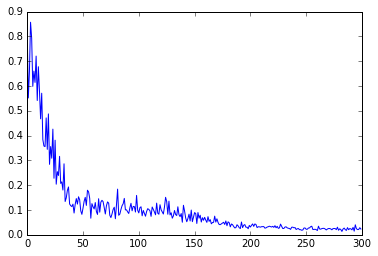

In [4]:
# EXAMPLE
# Learn cumsum over each sequence in x[i]

n_iterations = 300
for _ in xrange(n_iterations):
    x  = np.random.uniform(0,1,[seq_len,batch_size,num_units])
    y  = np.cumsum(x,axis=2)
    
    x_list = {key: value for (key, value) in zip(inputs, x)}
    y_list = {key: value for (key, value) in zip(result, y)}
    
    err,_ = sess.run([cost, step], feed_dict=dict(x_list.items()+y_list.items()))
    costs.append(err)

plt.plot(costs)